In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from mpl_toolkits import mplot3d

%matplotlib inline

In [28]:
boston = load_boston()

In [29]:
features = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=['TARGET'])

In [30]:
data = pd.concat([features, target], axis=1)

In [31]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [32]:
data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [60]:
X1 = data['LSTAT']
X2 = data['RM']
Y = data['TARGET']

In [61]:
X1 = np.array(X1/X1.mean())
X2 = np.array(X2/X2.mean())
Y = np.array(Y/Y.mean())

In [62]:
if len(X1) == len(X2):
    n = int(0.8 * len(X1))
print(n)

404


In [63]:
x1_train = X1[:n]
x2_train = X2[:n]
y_train = Y[:n]

In [64]:
x1_test = X1[n:]
x2_test = X2[n:]
y_test = Y[n:]

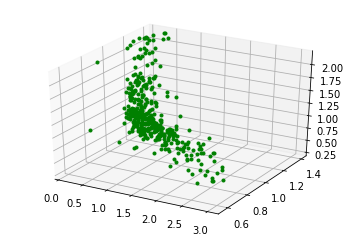

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.')

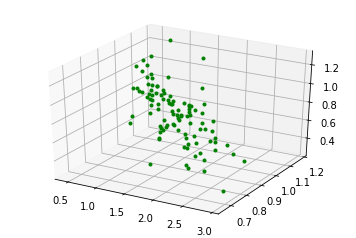

In [77]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_test, x2_test, y_test, 'g.')

In [66]:
def hypothesis(a,b,c,x1,x2):
    return a * x1 + b * x2 + c

In [67]:
def error(a,b,c,x1,x2,y):
    e = 0
    m = len(x1)
    for i in range(m):
        e += np.power((hypothesis(a,b,c,x1[i],x2[i]) - y[i]), 2)
    
    return (1/(2*m)) * e

In [68]:
def step_gradient(a,b,c,x1,x2,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x1)
    for i in range(m):
        grad_a += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x1[i]
        grad_b += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i]) * x2[i]
        grad_c += 2/m * (hypothesis(a,b,c,x1[i],x2[i]) - y[i])
        
    a = a - (grad_a * learning_rate)
    b = b - (grad_b * learning_rate)
    c = c - (grad_c * learning_rate)
    
    return a, b, c

In [69]:
def descend(initial_a, initial_b, initial_c, x1, x2, y, learning_rate, iterations):
    a = initial_a
    b = initial_b
    c = initial_c
    for i in range(iterations):
        e = error(a, b, c, x1, x2, y)
        if i % 1000 == 0:
            print(f"Error: {e}, a: {a}, b: {b}, c: {c}")
        
        a, b, c = step_gradient(a, b, c, x1, x2, y, learning_rate)

    return a, b, c

In [70]:
a = 0
b = 1
c = 1
learning_rate = 0.01
iterations = 10000

final_a, final_b, final_c = descend(a, b, c, x1_train, x2_train, y_train, learning_rate, iterations)


Error: 0.49225933062747074, a: 0, b: 1, c: 1
Error: 0.03327737738723468, a: -0.43818891207335414, b: 0.8164076771599545, c: 0.6470038067897109
Error: 0.03283012621702697, a: -0.42992614668922163, b: 0.8788690625409045, c: 0.5765109459941224
Error: 0.03244007827333656, a: -0.42110834318760104, b: 0.9365599208470883, c: 0.5102371327492583
Error: 0.03209972496284858, a: -0.4128611656537283, b: 0.9904444159009622, c: 0.44832501343966513
Error: 0.03180273485091283, a: -0.40515715786678497, b: 1.040779330139879, c: 0.3904911837235656
Error: 0.03154358318742041, a: -0.3979606339684135, b: 1.0877985407417885, c: 0.33646703153789576
Error: 0.03131744911092494, a: -0.39123816543713796, b: 1.1317204630028441, c: 0.2860016029916076
Error: 0.031120125968702613, a: -0.38495852491383037, b: 1.1727491240676389, c: 0.23886047490043763
Error: 0.030947943062614766, a: -0.3790925420657086, b: 1.2110751112310947, c: 0.19482466619491337


In [71]:
print(error(a, b, c, x1_train, x2_train, y_train))
print(error(final_a, final_b, final_c, x1_train, x2_train, y_train))

0.49225933062747074
0.030797697365049975


In [72]:
print(error(final_a, final_b, final_c, x1_test, x2_test, y_test))

0.029519447032381255


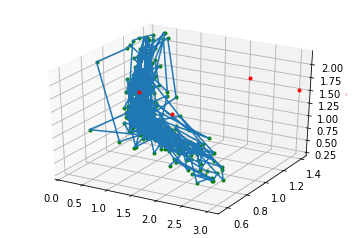

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot(x1_train, x2_train, y_train, 'g.', x1_train, x2_train, hypothesis(final_a, final_b, final_c, x1_train, x2_train), 'r.')

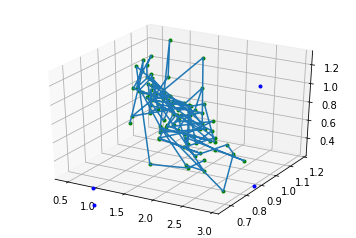

In [87]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x1_test, x2_test, y_test, 'g.', x1_test, x2_test, hypothesis(final_a, final_b, final_c, x1_test, x2_test), 'b.')